# Introduction :

This notebook represents the first steps to setup a damask job in pyiron.

Damask website example : https://damask.mpie.de/

**Files required to run the damask simulation**

**1.Material configuration :** It contains the five parts(a.) homogenization, (b.) microstructure, (c.) crystallite, (d.) phase, (e.) texture

Each of those parts contains a library of components necessary to describe the simulation parameters

**2.Load defination :** It contains information about applied stress and strain.

**3.Geometry :** It contain information about volume elements on a regular grid.

**Note :** Current example is compatible with damask version 3.0.0 alpha2

# Import pyiron and damask

In [1]:
from pyiron_base import Project
#import pyiron_continuum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
%matplotlib inline
import os

In [2]:
pr = Project('demo_steps')
pr.remove_jobs_silently(recursive=True)

# Define input

In [3]:
# create a Damaskjob
job = pr.create_job(pr.job_type.DAMASKjob, 'damask_job')
# material_configuration
job.input.material.read(os.path.join(os.getcwd(), 'material.yaml'))
# boundary condition, load_file
job.input.load.read(os.path.join(os.getcwd(), 'tensionX.yaml'))
# geometry
job.input.geometry.grid =  np.array([4,4,4])
job.input.geometry.size = np.array([1.0,1.0,1.0])
job.input.geometry.grains = 10

## Visulaize input parameters

In [4]:
job.input.material.homogenization.SX.N_constituents

1

# Run a job

In [5]:
job.run()

The job damask_job was saved and received the ID: 5


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


# Output

In [6]:
job.output.stress

array([8.09023642e-12, 6.56943797e+01, 7.85741440e+01, 8.19417171e+01,
       8.35545705e+01, 8.45350436e+01, 8.52488267e+01, 8.58102312e+01,
       8.62699059e+01, 8.66645215e+01, 8.70047004e+01, 8.79916990e+01,
       8.87055394e+01, 8.93041638e+01, 8.98530113e+01, 9.03793071e+01,
       9.08961177e+01, 9.14036452e+01, 9.19041873e+01, 9.23957797e+01,
       9.28776891e+01, 9.33506203e+01, 9.38163770e+01, 9.42771847e+01,
       9.47349308e+01, 9.51904490e+01])

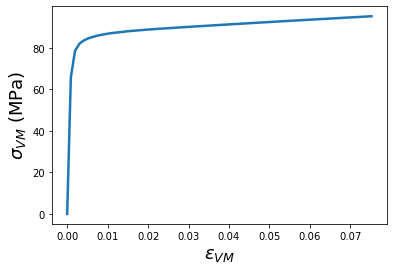

In [7]:
job.plot_stress_strain

In [8]:
job.mesh(inc=80)

RectilinearGrid (0x7fb48d8ff040)
  N Cells:	64
  N Points:	125
  X Bounds:	0.000e+00, 1.000e+00
  Y Bounds:	0.000e+00, 1.000e+00
  Z Bounds:	0.000e+00, 1.000e+00
  Dimensions:	5, 5, 5
  N Arrays:	5